# 5장

In [2]:
import matplotlib
matplotlib.rc('font', family="D2Coding")

%matplotlib inline

# 5.2 아이리스 데이터셋

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(
        range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()
df_iris = df

# 5.3 원형 차트

Text(0.5, 1.0, '꽃받침 너비로 분류한 붓꽃')

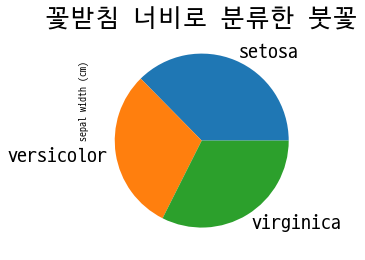

In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('꽃받침 너비로 분류한 붓꽃', fontsize=25)
# plt.savefig('iris_pie_for_one_variable.png')
# plt.close()

Text(0.5, 1.0, '종에 따른 전체 측정값Total Measurements, by Species')

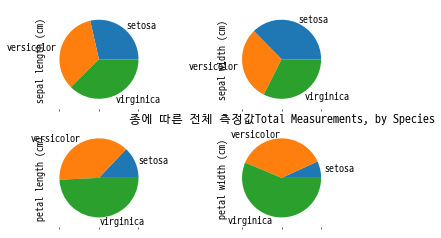

In [5]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
plt.title('종에 따른 전체 측정값Total Measurements, by Species')
# plt.savefig('iris_pie_for_each_variable.png')
# plt.close()


# 5.4 막대그래프

Text(0.5, 0.98, '종에 따른 전체 측정값')

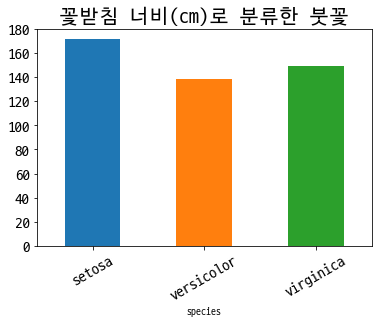

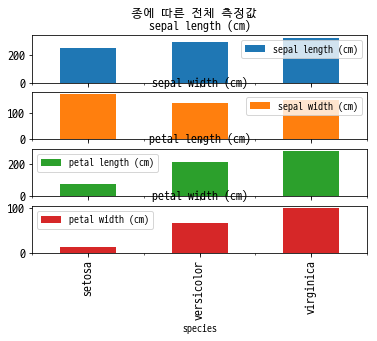

In [6]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

plt.title('꽃받침 너비(cm)로 분류한 붓꽃', fontsize=20)
# plt.savefig('iris_bar_for_one_variable.png')
# plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
   kind='bar', subplots=True, fontsize=12)
plt.suptitle('종에 따른 전체 측정값')
# plt.savefig('iris_bar_for_each_variable.png')
# plt.close()

# 5.5 히스토그램

Text(0.5, 0.98, '붓꽃 히스토그램')

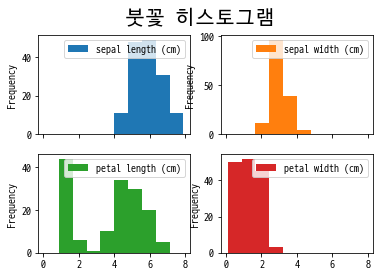

In [7]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('붓꽃 히스토그램', fontsize=20)
# plt.show()

Text(0.5, 0.98, '종에 따른 꽃잎 길이')

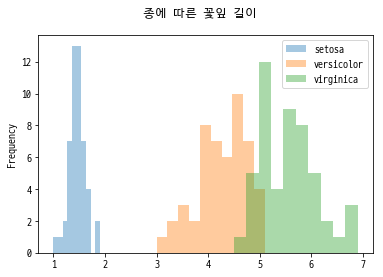

In [8]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)

plt.legend(loc='upper right')
plt.suptitle('종에 따른 꽃잎 길이')
# plt.savefig('iris_hist_by_spec.png')

# 5.6 평균, 표준편차, 중간값, 백분위

In [9]:
col = df['petal length (cm)']
average = col.mean()
std = col.std()
median = col.quantile(0.5)
percentile25 = col.quantile(0.25)
percentile75 = col.quantile(0.75)
print(average, std, median, percentile25, percentile75)

3.758 1.76529823326 4.35 1.6 5.1


### 아웃라이어 걸러내기

In [10]:
col = df['petal length (cm)']
perc25 = col.quantile(0.25)
perc75 = col.quantile(0.75)
clean_avg = col[(col>perc25)&(col<perc75)].mean()
print(clean_avg)

4.0984375


# 5.7 상자그림

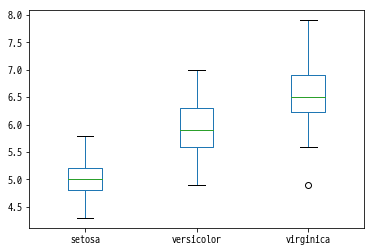

In [11]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
# plt.show()

# 5.8 산포도

Text(0.5, 1.0, 'Length vs Width')

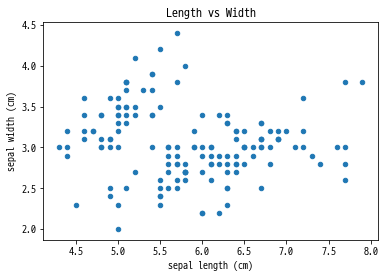

In [12]:
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
# plt.show()

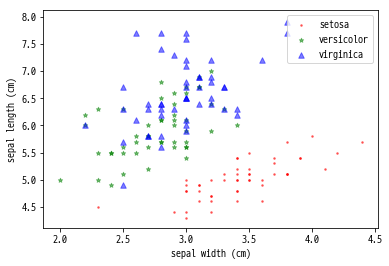

In [13]:
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",
        x="sepal width (cm)", y="sepal length (cm)",
        alpha=0.5, s=10*(i+1), ax=ax,
        color=colors[i], marker=markers[i], label=spec)
    
plt.legend()
plt.show()

Text(0.5, 1.0, '일반축에 나타낸 범죄 발생률')

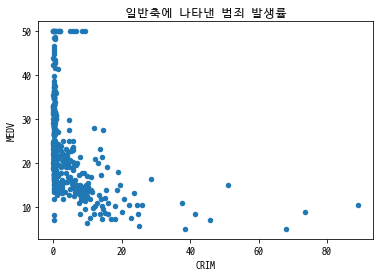

In [14]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# 팬다스 데이터프레임 생성
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# 일반적인 산포도
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('일반축에 나타낸 범죄 발생률')
# plt.show()

## 로그를 적용

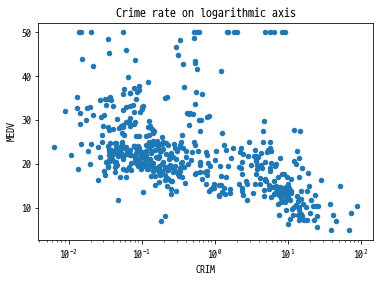

In [15]:
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

# 5.10 산포 행렬

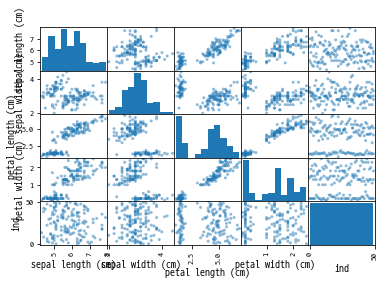

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_iris)
plt.show()

# 5.11 히트맵

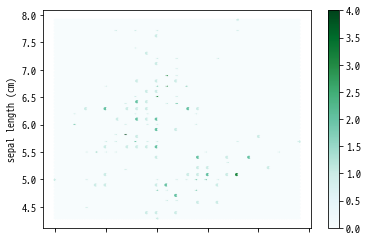

In [17]:
df_iris.plot(kind="hexbin", x="sepal width (cm)", y="sepal length (cm)")
plt.show()

# 5.12 상관관계

In [18]:
df_iris["sepal width (cm)"].corr(df_iris["sepal length (cm)"])  # Pearson corr

-0.11756978413300208

In [19]:
df_iris["sepal width (cm)"].corr(df_iris["sepal length (cm)"], method="pearson")

-0.11756978413300208

In [20]:
df_iris["sepal width (cm)"].corr(df_iris["sepal length (cm)"], method="spearman")

-0.16677765828323499

In [21]:
df_iris["sepal width (cm)"].corr(df_iris["sepal length (cm)"], method="kendall")

-0.076996788116516696

# 5.12 시계열 데이터

In [2]:
# $ pip install statsmodels
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.datasets import co2

matplotlib.rc('font', family="D2Coding")

dta = co2.load_pandas().data
dta.plot()
plt.title("이산화탄소 농도")
plt.ylabel("PPM")
plt.show()

## 구글 주가 불러오는 코드는 야후 API가 작동하지 않아서 생략합니다.